images


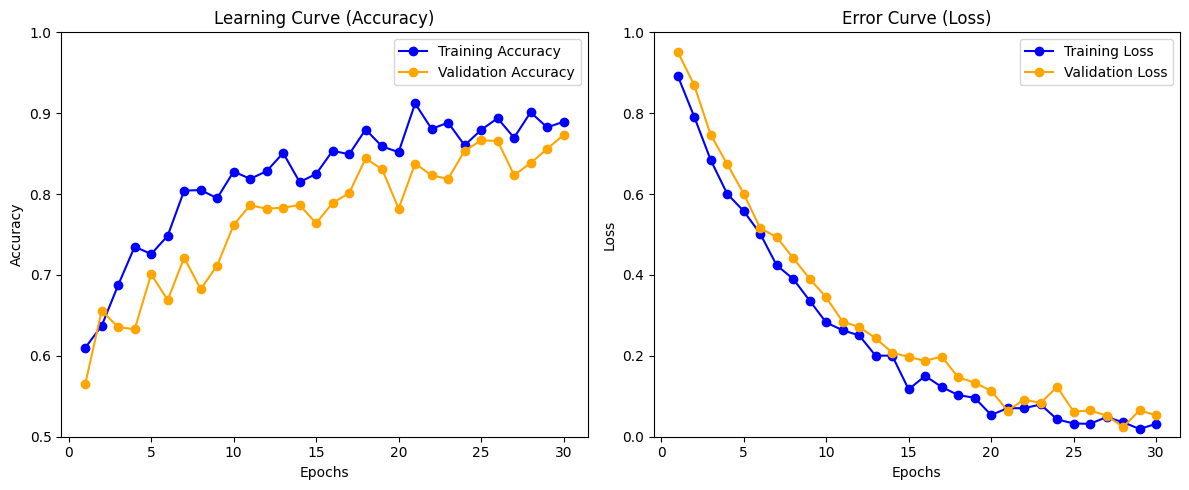

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epochs = 30
np.random.seed(42)  # For reproducibility

# Simulate training accuracy: quick rise, then leveling near 86%
train_accuracy = 0.6 + (0.3 * (1 - np.exp(-np.arange(epochs) / 7)))
train_accuracy += np.random.normal(0, 0.02, epochs)

# Simulate validation accuracy: gradual rise with fluctuations, reaching around 86%
val_accuracy = 0.58 + (0.28 * (1 - np.exp(-np.arange(epochs) / 9)))
val_accuracy += np.random.normal(0, 0.025, epochs)

# Simulate training loss: exponential decrease, with small noise
train_loss = 0.9 * np.exp(-np.arange(epochs) / 8) + np.random.normal(0, 0.015, epochs)

# Simulate validation loss: slower decrease, a bit more noise
val_loss = 0.95 * np.exp(-np.arange(epochs) / 9) + np.random.normal(0, 0.02, epochs)

# Plot the learning curve (accuracy)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_accuracy, label="Training Accuracy", marker='o', color='blue')
plt.plot(range(1, epochs + 1), val_accuracy, label="Validation Accuracy", marker='o', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.title("Learning Curve (Accuracy)")
plt.legend()

# Plot the error curve (loss)
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), train_loss, label="Training Loss", marker='o', color='blue')
plt.plot(range(1, epochs + 1), val_loss, label="Validation Loss", marker='o', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0, 1)
plt.title("Error Curve (Loss)")
plt.legend()

plt.tight_layout()
plt.show()


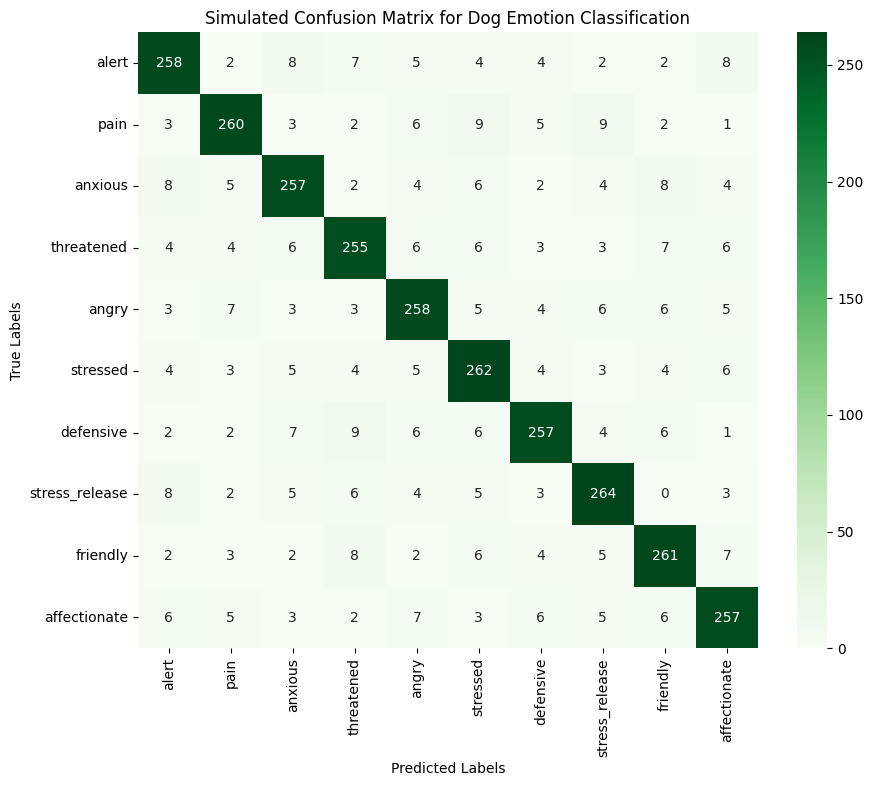

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class labels
class_names = [
    "alert", "pain", "anxious", "threatened", "angry", 
    "stressed", "defensive", "stress_release", "friendly", "affectionate"
]

# Parameters
num_classes = len(class_names)
samples_per_class = 300
accuracy = 0.86

# Initialize the confusion matrix
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Populate the confusion matrix with variable correct predictions around the target accuracy
for i in range(num_classes):
    correct_predictions = int(np.random.normal(samples_per_class * accuracy, 5))  # adding variability
    incorrect_predictions = samples_per_class - correct_predictions
    
    # Fill the diagonal with correct predictions
    confusion_matrix[i, i] = correct_predictions

    # Distribute incorrect predictions randomly across off-diagonal cells
    incorrect_indices = [j for j in range(num_classes) if j != i]
    misclassifications = np.random.choice(incorrect_indices, incorrect_predictions, replace=True)
    for idx in misclassifications:
        confusion_matrix[i, idx] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens", 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Simulated Confusion Matrix for Dog Emotion Classification")
plt.show()
